In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [2]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Length
0,1,https://www.boatos.org/saude/cadastro-conecte-...,2021-01-09 21:02:08,Cadastro do Conecte SUS será obrigatório para ...,"Pessoal, todo mundo precisa se cadastrar no co...",1,73
1,2,https://www.boatos.org/mundo/cristina-kirchner...,2021-01-09 14:32:34,Cristina Kirchner tomou vacina da Covid-19 sem...,"A vice-presidente argentina, é a primeira mul...",1,64
2,3,https://www.boatos.org/saude/gerson-camarotti-...,2021-01-08 19:13:52,Gerson Camarotti pediu cassação do registro de...,ESTE SAFADO ESTA PEDINDO PARA OS CONSELHOS T...,1,97
3,4,https://www.boatos.org/saude/secretario-saude-...,2021-01-08 16:33:39,Secretário de Saúde de Minas Gerais escreve me...,Mensagem do Secretário Estado Saúde de Minas ...,1,72
4,5,https://www.boatos.org/mundo/presidente-pais-l...,2021-01-07 17:51:58,Presidente de país do Leste Europeu se vacinou...,"OLHEM ISSO, OS GOVERNANTES COMO SEU DÓRIA, EST...",1,58


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jul_dez_2021 = data.loc[(data['date'] >= '2021-07-01') & (data['date'] <= '2022-01-01')]
filtered_jul_dez_2021


,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
118,164,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,Cientistas descobrem que a cloroquina é a cura...,“Globo e O Antagonista publicaram o furo de re...,1,NaN,69
119,165,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,Cientistas descobrem que a cloroquina é a cura...,“Globo publicou ontem que um estudo de Cambri...,1,NaN,69
120,166,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,Cientistas descobrem que a cloroquina é a cura...,“Moral da historia: descobriram que cloroquin...,1,NaN,69
121,167,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,Cientistas descobrem que a cloroquina é a cura...,“Ômicron é menos agressiva porque entra pela ...,1,NaN,69
122,169,https://www.boatos.org/esporte/fifa-confirma-q...,2021-12-29 18:49:20,Fifa confirma que 108 jogadores morreram por c...,"“Segundo dados imprecisos da FIFA, 183 jogador...",1,NaN,77
...,...,...,...,...,...,...,...,...
246,332,https://www.boatos.org/brasil/bandidos-distrib...,2021-07-07 13:58:38,Bandidos estão distribuindo máscaras com produ...,“BOLETIM DA POLÍCIA. Aviso!!! Pessoas não iden...,1,NaN,89
247,334,https://www.boatos.org/saude/vacinas-contra-co...,2021-07-05 17:30:02,Vacinas contra Covid-19 contêm 80% a 90% de óx...,"A falsa nova variante, a maioria está vacinada...",1,NaN,61
248,335,https://www.boatos.org/saude/beber-vinho-previ...,2021-07-05 10:32:41,"Por causa do ácido tânico e polifenóis, vinho ...",“O ácido tânico * encontrado nas uvas e no vin...,1,NaN,65
249,337,https://www.boatos.org/saude/cientista-oms-vai...,2021-07-02 12:47:32,Cientista da OMS vai ser condenada à morte por...,"Em 25 de maio, a Indian Bar Association (IBA) ...",1,NaN,74


In [4]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jul_dez_2021['title'] = filtered_jul_dez_2021['title'].apply(word_tokenize)
filtered_jul_dez_2021['title'] = filtered_jul_dez_2021['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jul_dez_2021['title'])


118    cientist descobr que a cloroquin é a cur par v...
119    cientist descobr que a cloroquin é a cur par v...
120    cientist descobr que a cloroquin é a cur par v...
121    cientist descobr que a cloroquin é a cur par v...
122    fif confirm que 108 jogador morr por caus da v...
                             ...                        
246    band estã distribu másc com produt químic de c...
247    vacin contr covid-19 contêm 80 % a 90 % de óxi...
248    por caus do ácid tânic e polifenó , vinh previ...
249    cientist da oms vai ser conden à mort por nã r...
250    variant delt da covid-19 nã caus febr e toss e...
Name: title, Length: 133, dtype: object


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_30809/3456333298.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2021['title'] = filtered_jul_dez_2021['title'].apply(word_tokenize)
/tmp/ipykernel_30809/3456333298.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2021['title'] = filtered_jul_dez_2021['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [5]:
import texthero as hero # text hero  
filtered_jul_dez_2021["PCA"] = (
            filtered_jul_dez_2021['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)

/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [6]:
filtered_jul_dez_2021

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
118,164,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,cientist descobr que a cloroquin é a cur par v...,“Globo e O Antagonista publicaram o furo de re...,1,NaN,69,"[-0.8351081722678656, -1.570480852781871]"
119,165,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,cientist descobr que a cloroquin é a cur par v...,“Globo publicou ontem que um estudo de Cambri...,1,NaN,69,"[-0.8351081722678608, -1.570480852781871]"
120,166,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,cientist descobr que a cloroquin é a cur par v...,“Moral da historia: descobriram que cloroquin...,1,NaN,69,"[-0.8351081722678666, -1.570480852781873]"
121,167,https://www.boatos.org/saude/cientistas-descob...,2021-12-30 14:54:39,cientist descobr que a cloroquin é a cur par v...,“Ômicron é menos agressiva porque entra pela ...,1,NaN,69,"[-0.8351081722678704, -1.5704808527818805]"
122,169,https://www.boatos.org/esporte/fifa-confirma-q...,2021-12-29 18:49:20,fif confirm que 108 jogador morr por caus da v...,"“Segundo dados imprecisos da FIFA, 183 jogador...",1,NaN,77,"[-1.51518624237109, 0.41673848794448426]"
...,...,...,...,...,...,...,...,...,...
246,332,https://www.boatos.org/brasil/bandidos-distrib...,2021-07-07 13:58:38,band estã distribu másc com produt químic de c...,“BOLETIM DA POLÍCIA. Aviso!!! Pessoas não iden...,1,NaN,89,"[0.010911617453967255, -0.33668821503147706]"
247,334,https://www.boatos.org/saude/vacinas-contra-co...,2021-07-05 17:30:02,vacin contr covid-19 contêm 80 % a 90 % de óxi...,"A falsa nova variante, a maioria está vacinada...",1,NaN,61,"[0.5295439299940611, 0.22060120021023147]"
248,335,https://www.boatos.org/saude/beber-vinho-previ...,2021-07-05 10:32:41,"por caus do ácid tânic e polifenó , vinh previ...",“O ácido tânico * encontrado nas uvas e no vin...,1,NaN,65,"[-0.6678928986009537, 0.6822535738721919]"
249,337,https://www.boatos.org/saude/cientista-oms-vai...,2021-07-02 12:47:32,cientist da oms vai ser conden à mort por nã r...,"Em 25 de maio, a Indian Bar Association (IBA) ...",1,NaN,74,"[-1.7291741462453991, 3.187325898525527]"


# K-Means

In [7]:
filtered_jul_dez_2021['PCA']

118       [-0.8351081722678656, -1.570480852781871]
119       [-0.8351081722678608, -1.570480852781871]
120       [-0.8351081722678666, -1.570480852781873]
121      [-0.8351081722678704, -1.5704808527818805]
122        [-1.51518624237109, 0.41673848794448426]
                           ...                     
246    [0.010911617453967255, -0.33668821503147706]
247       [0.5295439299940611, 0.22060120021023147]
248       [-0.6678928986009537, 0.6822535738721919]
249        [-1.7291741462453991, 3.187325898525527]
250       [-1.2485296127523169, -1.293952255572777]
Name: PCA, Length: 133, dtype: object

In [8]:
finalModel = filtered_jul_dez_2021['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[-8.35108172e-01, -1.57048085e+00],
       [-8.35108172e-01, -1.57048085e+00],
       [-8.35108172e-01, -1.57048085e+00],
       [-8.35108172e-01, -1.57048085e+00],
       [-1.51518624e+00,  4.16738488e-01],
       [-6.89310517e-01, -1.12639266e-01],
       [-9.92643115e-01, -6.43543642e-01],
       [-9.92643115e-01, -6.43543642e-01],
       [-7.93471226e-01, -3.91887973e-01],
       [-2.49079364e-01, -9.02378928e-01],
       [-8.71798830e-01,  1.31656703e-01],
       [-8.71798830e-01,  1.31656703e-01],
       [-7.61706801e-01,  8.52954628e-01],
       [ 3.60178832e-02, -1.00682998e+00],
       [-1.03494134e+00, -1.15603499e+00],
       [-5.44172512e-01, -6.45630131e-01],
       [-7.86472614e-01, -3.40559142e+00],
       [-9.25896873e-01, -6.41402901e-01],
       [-9.25896873e-01, -6.41402901e-01],
       [-9.25896873e-01, -6.41402901e-01],
       [-9.25896873e-01, -6.41402901e-01],
       [-1.75043248e-01,  6.19372534e-01],
       [-2.78046248e+00,  1.03545349e+01],
       [-2.

In [9]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.5301869768899015
2 : 1.7170632415289355
3 : 1.2762432324949116
4 : 0.9623689126107331
5 : 0.8157791514426096
6 : 0.712579209931804
7 : 0.6279220018039715
8 : 0.5401456621213783
9 : 0.5097316750634631


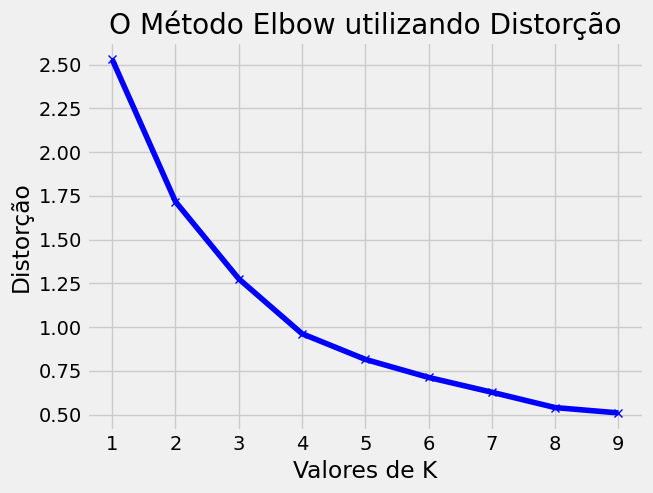

In [10]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [11]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2026.4835739480006
2 : 937.8191693116938
3 : 348.1033186218561
4 : 187.62677830852704
5 : 136.75013611569102
6 : 97.80229558278259
7 : 75.08328810624552
8 : 57.05756633311379
9 : 47.21680669248599


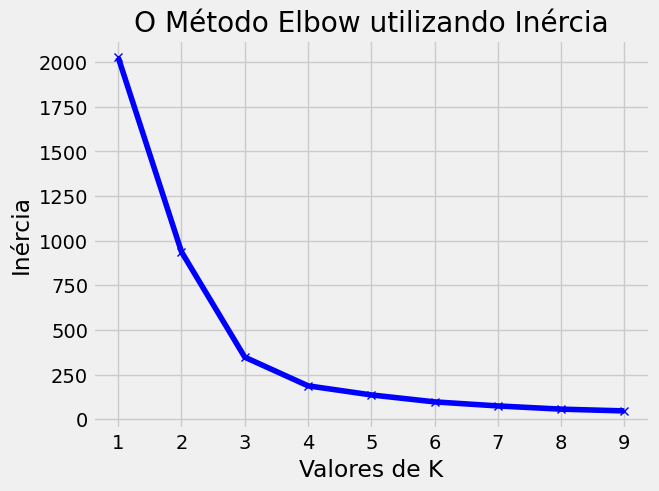

In [12]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

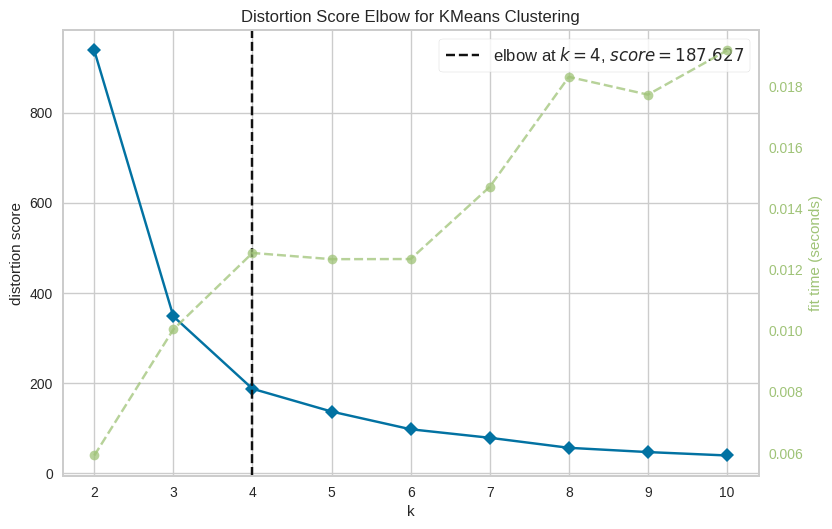

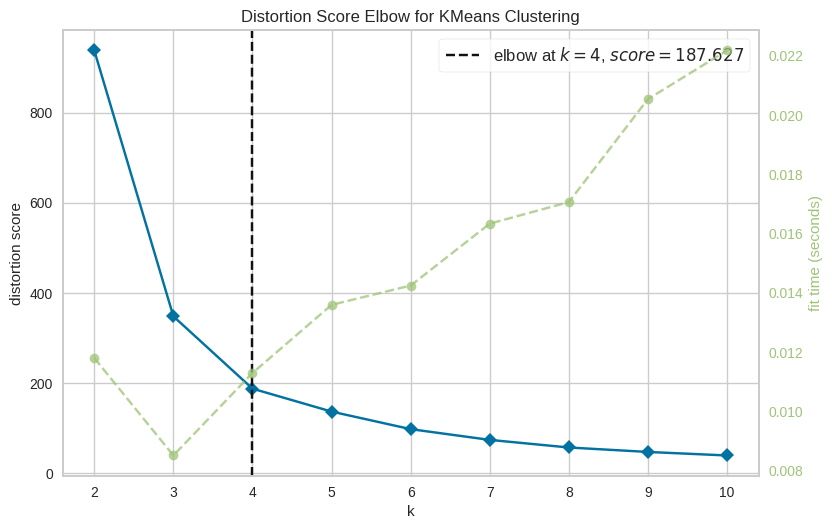

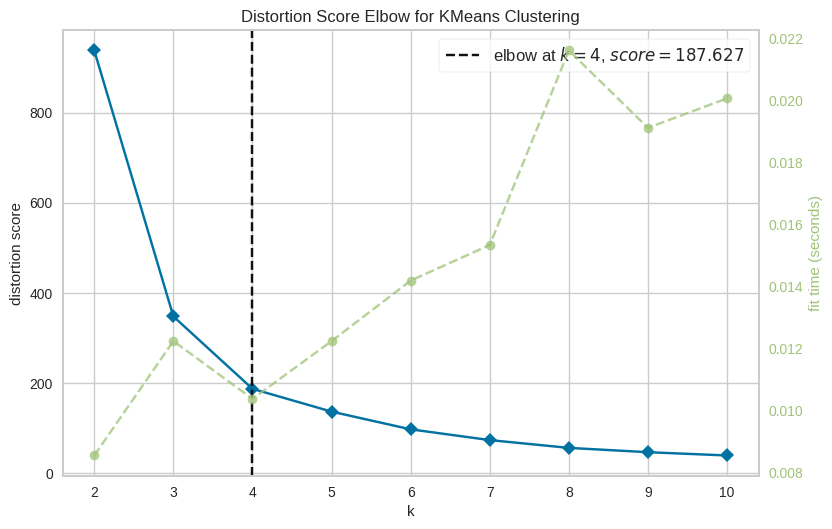

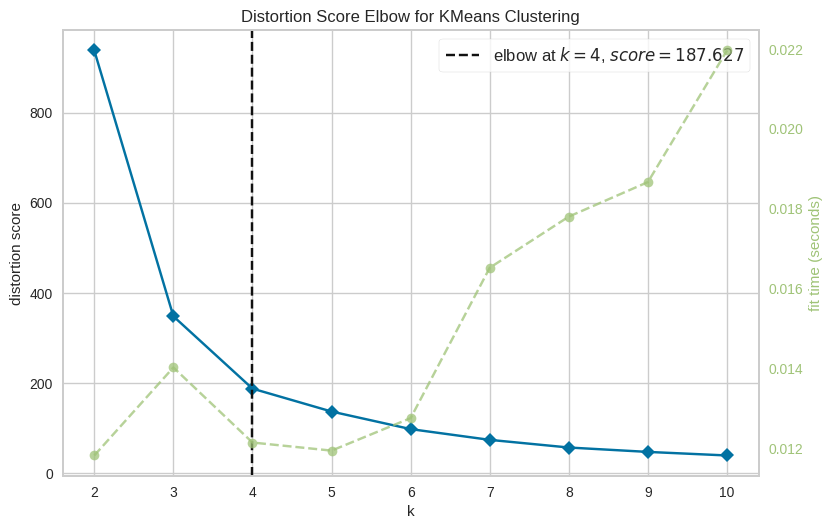

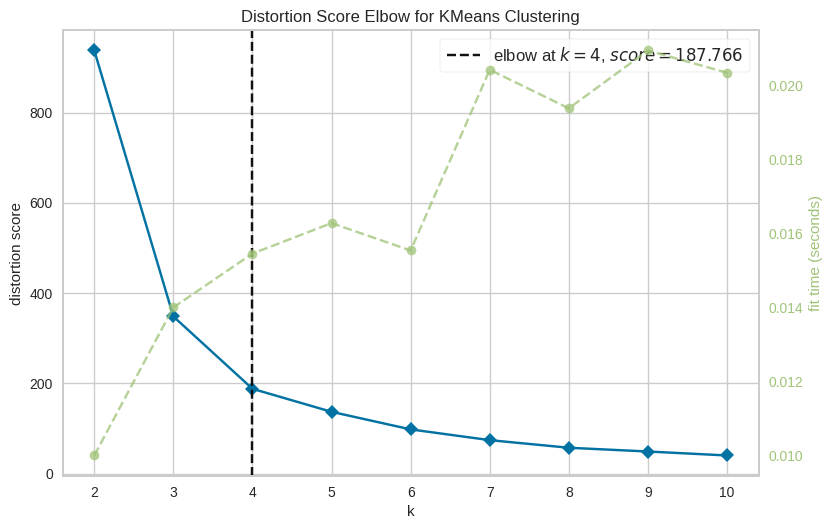

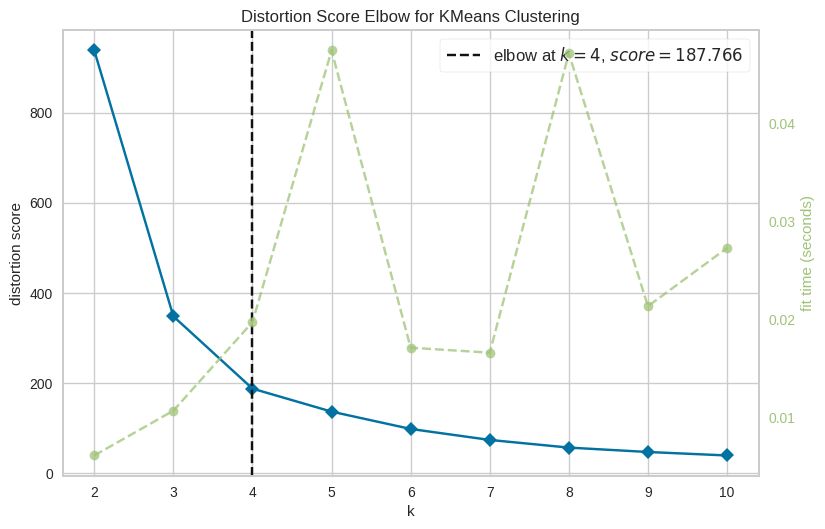

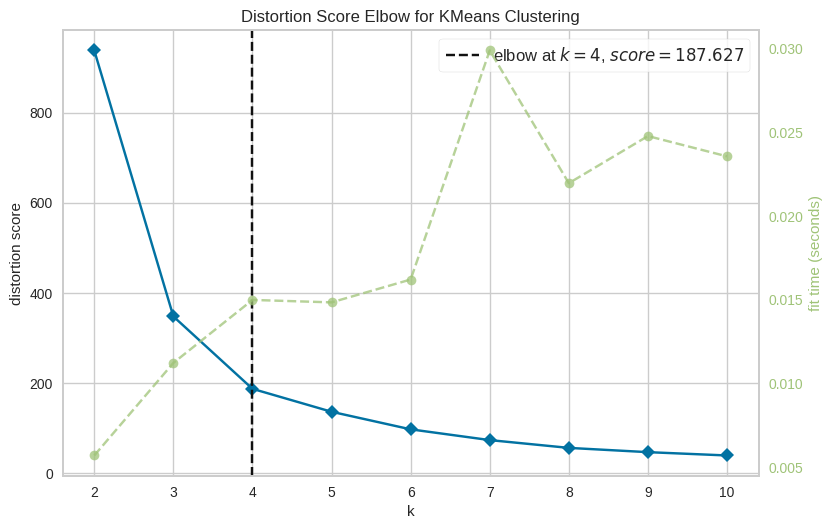

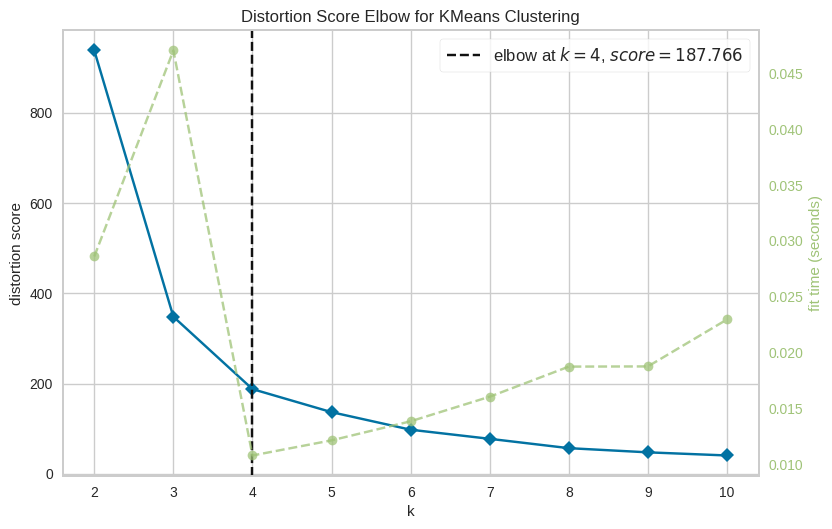

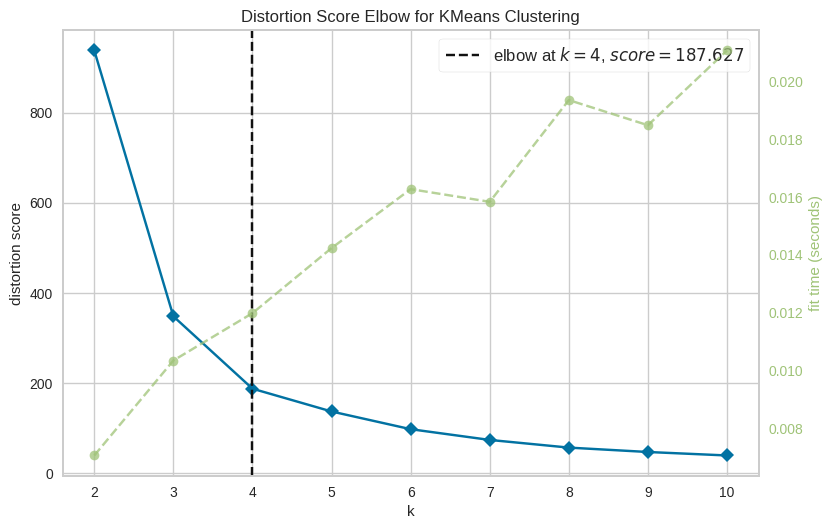

In [13]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jul_dez_2021['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  

## K = 4

[2 2 2 2 0 0 2 2 0 2 0 0 0 2 2 2 2 2 2 2 2 0 3 3 3 3 3 2 0 0 0 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 2 0
 2 2 0 0 0 0 0 0 0 2 2 0 0 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0
 2 2 0 2 0 1 1 1 1 1 1 1 0 2 2 0 2 0 0 0 0 2]


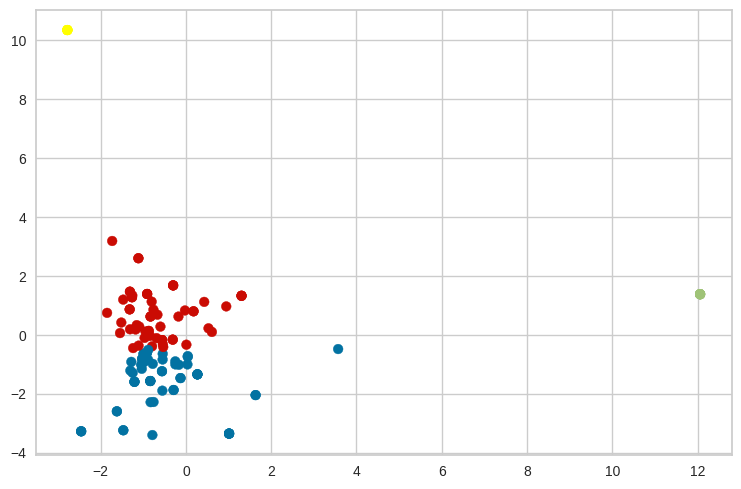

In [14]:
finalModel2 = filtered_jul_dez_2021['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=4).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)


In [15]:
kmeanModel2.labels_

array([2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2], dtype=int32)

In [16]:
array2 = np.array((list(filtered_jul_dez_2021["title"])))
array2

array(['cientist descobr que a cloroquin é a cur par variant ômicron',
       'cientist descobr que a cloroquin é a cur par variant ômicron',
       'cientist descobr que a cloroquin é a cur par variant ômicron',
       'cientist descobr que a cloroquin é a cur par variant ômicron',
       'fif confirm que 108 jogador morr por caus da vacin contr covid-19',
       'pfiz admit que vai lev 5 anos par descobr risc de vacin par crianc',
       'bill gat pag par andrew hill neg a eficác da ivermectin',
       'bill gat pag par andrew hill neg a eficác da ivermectin',
       'estud feit pel sus comprov eficác da ivermectin no combat à covid-19',
       'anvis alert que vacin caus mort súbit ( miocardit ) e ataqu cardíac ( pericardit ) depo de vacin 180 milhõ',
       'elon musk se recus a tom vacin contr covid-19',
       'elon musk se recus a tom vacin contr covid-19',
       'apple vai desbloqu o iphon 13 apen par vacin',
       'robert malon é o inventor da vacin mrna e está cert sobr vac

In [17]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jul_dez_2021["title"], pred_classes))
dictionaryPrime

{'cientist descobr que a cloroquin é a cur par variant ômicron': 2,
 'fif confirm que 108 jogador morr por caus da vacin contr covid-19': 0,
 'pfiz admit que vai lev 5 anos par descobr risc de vacin par crianc': 0,
 'bill gat pag par andrew hill neg a eficác da ivermectin': 2,
 'estud feit pel sus comprov eficác da ivermectin no combat à covid-19': 0,
 'anvis alert que vacin caus mort súbit ( miocardit ) e ataqu cardíac ( pericardit ) depo de vacin 180 milhõ': 2,
 'elon musk se recus a tom vacin contr covid-19': 0,
 'apple vai desbloqu o iphon 13 apen par vacin': 0,
 'robert malon é o inventor da vacin mrna e está cert sobr vacin de crianc': 2,
 'taiwan admit que vacin mat mais do que a covid-19': 2,
 'nitazoxan reduz covid-19 em 94 % e é a cur da doenc': 2,
 'variant ômicron nã tem sintom com toss e febr e é mais mortal que a delt': 2,
 'japã venc a covid-19 grac ao uso da ivermectin': 2,
 'austrál cri camp de concentr par não-vacin e vai vacin crianc à forc': 0,
 "oms vai ser julg em

## Word Cloud for first cluster n = 0

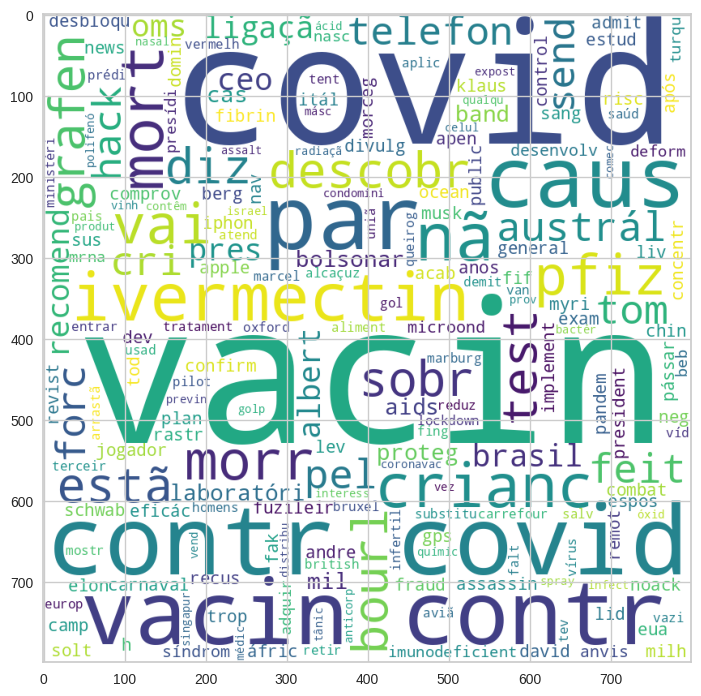

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']

clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)


## Word Cloud for second cluster n = 1

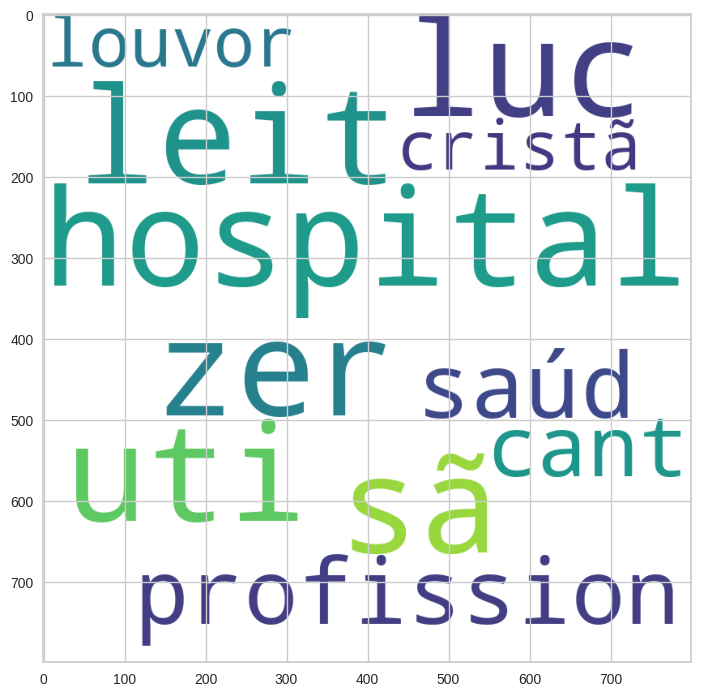

In [19]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]

unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

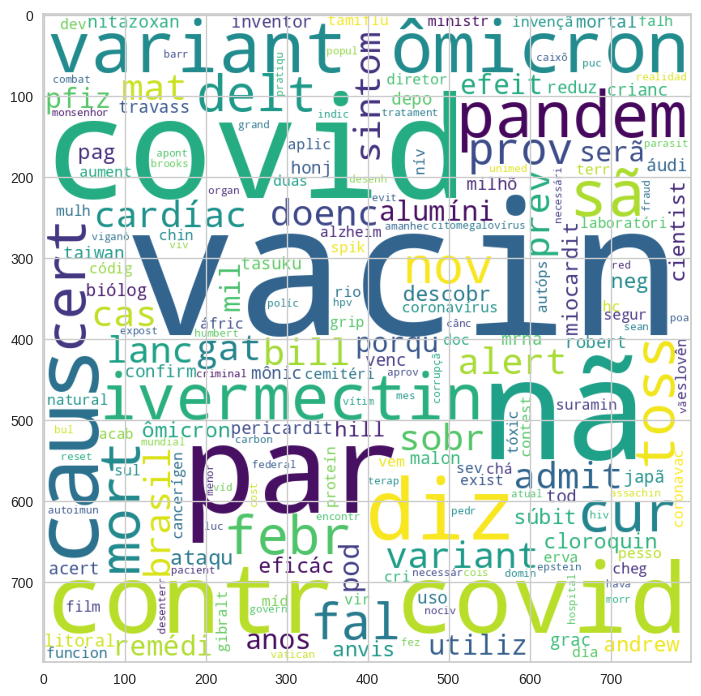

In [20]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)

## Word Cloud for fourth cluster n = 3

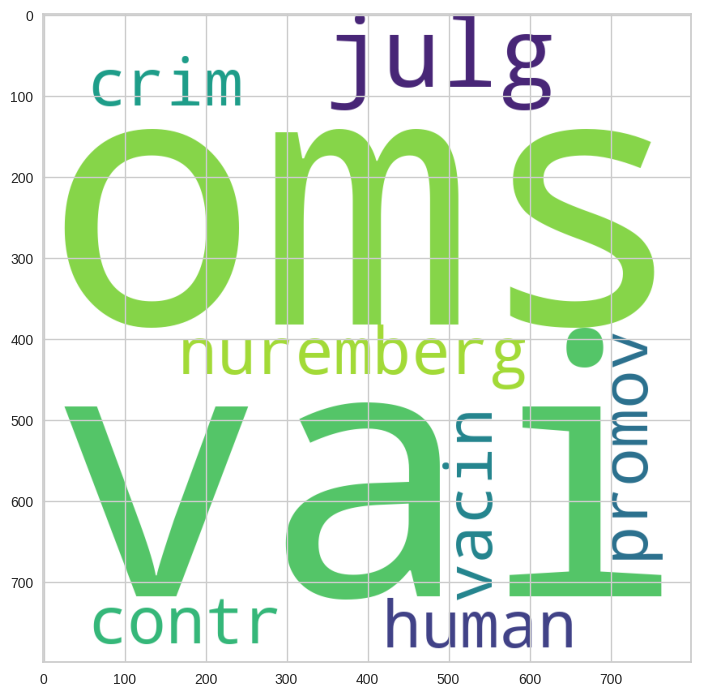

In [22]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)